Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Series([], dtype: bool)
Shape (rows, columns):  (16598, 11) 

number of rows:  16598
number of columns:  11


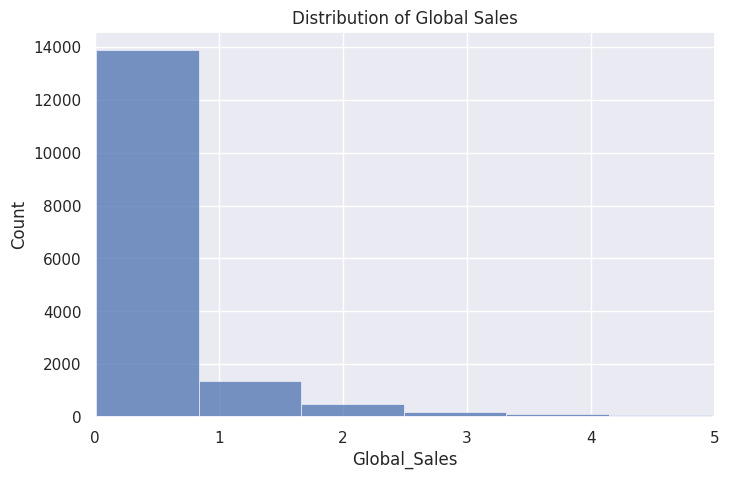

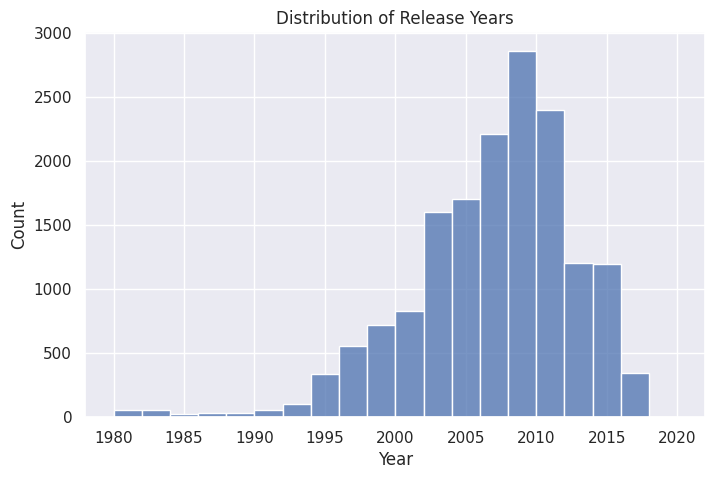

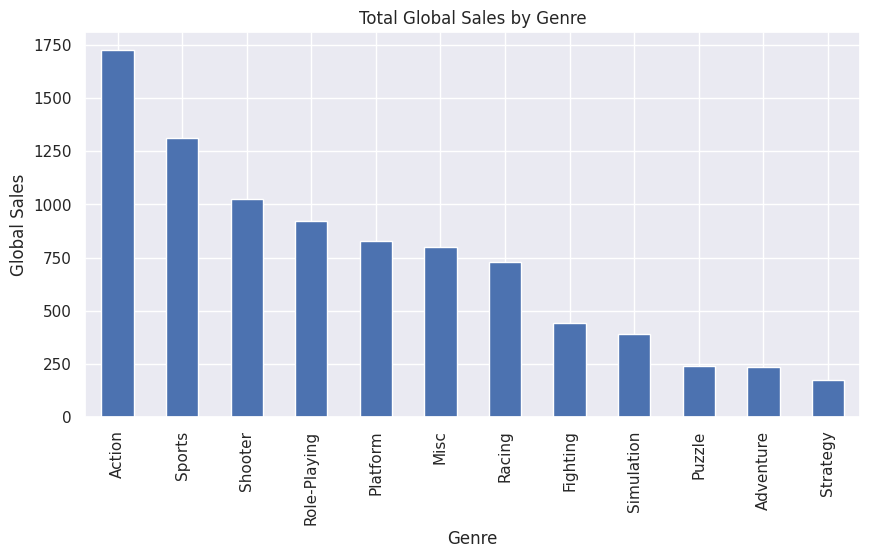

Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
Name: Global_Sales, dtype: float64


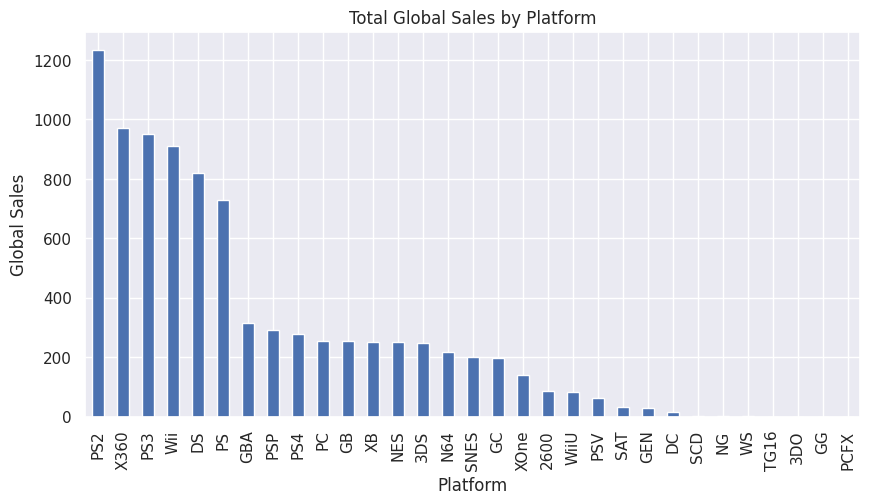

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
PS       727.39
GBA      313.56
PSP      291.71
PS4      278.10
PC       255.05
GB       254.42
XB       252.09
NES      251.07
3DS      246.28
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.63
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64
Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Name: Global_Sales, dtype: float64


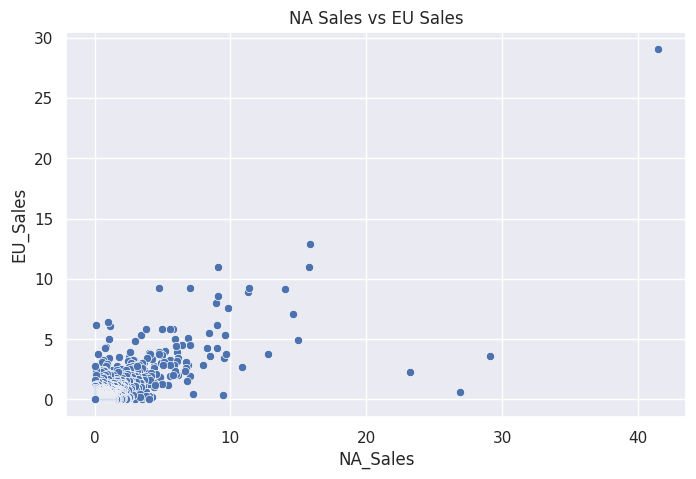

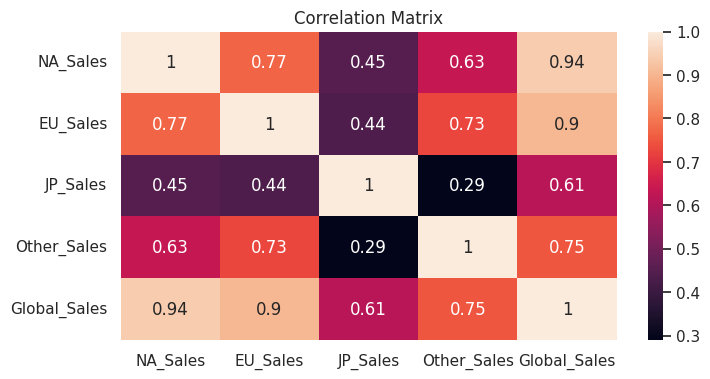

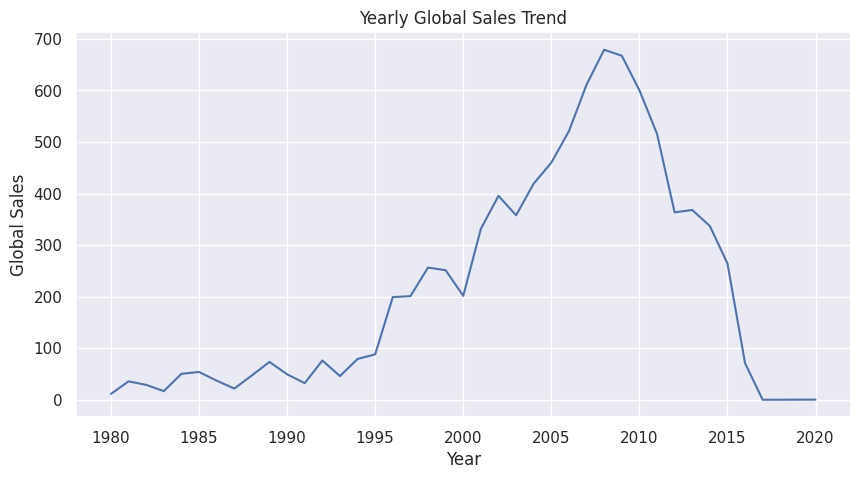

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("vgsales.csv")

df.head()

print(df.isna().sum())

print(df.duplicated()[df.duplicated()==True])

print("Shape (rows, columns): ", df.shape,"\n")
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

df.dtypes

df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

df.dtypes

df.describe(include='all')

plt.figure(figsize=(8,5))
sns.histplot(df['Global_Sales'], bins=100)
plt.title("Distribution of Global Sales")
plt.xlim(0, 5)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Year'], bins=20)
plt.title("Distribution of Release Years")
plt.show()

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_sales.plot(kind='bar')
plt.title("Total Global Sales by Genre")
plt.ylabel("Global Sales")
plt.show()

print(genre_sales)

platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
platform_sales.plot(kind='bar')
plt.title("Total Global Sales by Platform")
plt.ylabel("Global Sales")
plt.show()

print(platform_sales)

top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

print(top_games.head(10))

plt.figure(figsize=(8,5))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title("NA Sales vs EU Sales")
plt.show()

plt.figure(figsize=(8,4))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10,5))
yearly_sales.plot()
plt.title("Yearly Global Sales Trend")
plt.ylabel("Global Sales")
plt.show()